In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15352, done.
remote: Total 15352 (delta 0), reused 0 (delta 0), pack-reused 15352
Receiving objects: 100% (15352/15352), 14.33 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (10500/10500), done.


In [ ]:
!pip install -r /content/yolov5/requirements.txt # install


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.3 MB/s eta 0:00:00


In [1]:
!unzip /content/drive/MyDrive/my_datasets/jewellery/jewellery_yolo.zip -d /content/dataset

Archive:  /content/drive/MyDrive/my_datasets/jewellery/jewellery_yolo.zip
 extracting: /content/dataset/README.dataset.txt  
 extracting: /content/dataset/README.roboflow.txt  
 extracting: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/-1117Wx1400H-462160836-pink-MODEL5_jpg.rf.9261af7dcdc2e362af0b672bc53ada4a.jpg  
 extracting: /content/dataset/test/images/00001_Irene_Round_Pave_Engagement_Ring_Wedding_Rings_Moissanite_Lab_Created_Diamond_GIA_Diamond_ARIJEI_Front_Yellow_Gold_9264f257-b5a9-43f3-817b-c8e666f71b43_150x_jpg.rf.139e00c38efb2b26f6deb4a5d828c598.jpg  
 extracting: /content/dataset/test/images/0001_jpg.rf.ae87b4043365ecd7137319b0f34dea3f.jpg  
 extracting: /content/dataset/test/images/001-014-01148-image-1_jpg.rf.ef09c8d3769b7b453dfdf62fd8fec22c.jpg  
 extracting: /content/dataset/test/images/031287_1024x1024_jpg.rf.a5512afbc78d7543b85656efa9aca829.jpg  
 extracting: /conten

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/dataset/data.yaml --weights yolov5x.pt

train: weights=yolov5x.pt, cfg=, data=/content/dataset/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-131-g0c8de3f Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

In [ ]:
!cp "/content/yolov5/runs/train/exp/weights/best.pt" /content/drive/MyDrive/my_models/jewellery/jewellery_yolo.pt

In [3]:
import torch

In [4]:
model = torch.hub.load( "ultralytics/yolov5",  "custom","/content/drive/MyDrive/my_models/jewellery/jewellery_yolo.pt",force_reload=True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 7.

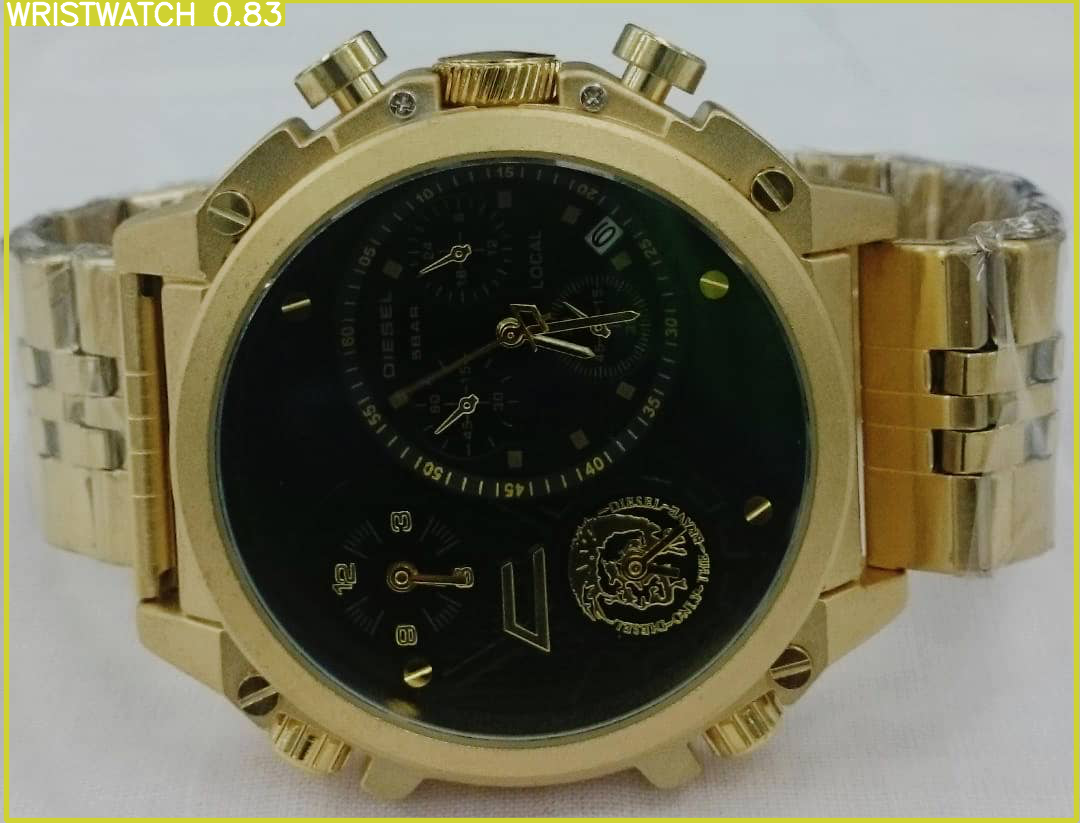

In [5]:
result = model("/content/IMG-20181209-WA0025.jpg")
result.show()

In [ ]:
import os
import glob
import cv2

image_folder = "/content/drive/MyDrive/temp"
image_extensions = ["*.jpg", "*.jpeg", "*.png"] 

image_paths = []
for ext in image_extensions:
    image_paths.extend(glob.glob(os.path.join(image_folder, ext)))

for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print(f"Could not read image at path {path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (500, 300)) 
    result = model(image)
    result.show()
    print("\n")

Output hidden; open in https://colab.research.google.com to view.